In [1]:
2 * 3

6

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
# from scikit-learn.linear_model import Ridge
# from scikitlearn.linear_model import Ridge
import seaborn as sns ; sns.set()

In [3]:
# Make some data in the form of a shallow S
np.random.seed(42)
num_pts = 100
noise_range = 0.2
x_vals = []
y_vals = []
(x_left, x_right) = (-2, 2)
for i in range(num_pts):
    x = np.random.uniform(x_left, x_right)
    y = np.random.uniform(-noise_range, noise_range) + (2*math.sin(x))
    x_vals.append(x)
    y_vals.append(y)
x_column = np.reshape(x_vals, [len(x_vals), 1])

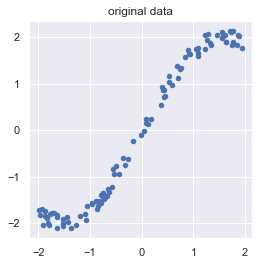

In [4]:
# Let's look at the data...
plt.figure(figsize=(4,4))
plt.scatter(x_vals, y_vals, s=20)
plt.title('original data')
plt.show()

In [5]:
# Oct 7

In [6]:
# Make a File_Helper for saving and loading files.

save_files = False

import os, sys, inspect
current_dir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
sys.path.insert(0, os.path.dirname(current_dir)) # path to parent dir
# from DLBasics_Utilities import File_Helper
# file_helper = File_Helper(save_files)

In [7]:
# Make a Ridge estimator
ridge_estimator = Ridge()

In [8]:
# Train the estimator on our data
ridge_estimator.fit(x_column, y_vals)

Ridge()

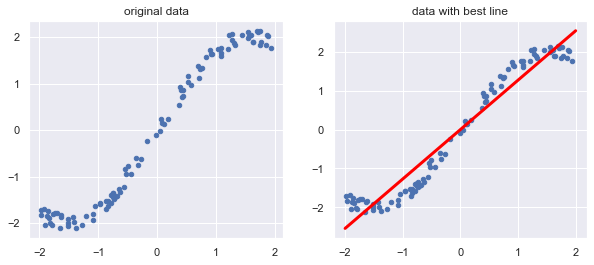

In [10]:
# Let's look at the data and the straight-line fit found by Ridge
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.scatter(x_vals, y_vals, s=20)
plt.title('original data')

plt.subplot(1,2,2)
plt.scatter(x_vals, y_vals, s=20)
y_left = ridge_estimator.predict([[x_left]])
y_right = ridge_estimator.predict([[x_right]])
plt.plot([x_left, x_right], [y_left, y_right], color='#ff0000', linewidth=3)
plt.title('data with best line')

# file_helper.save_figure('ridge-demo')
plt.show()

In [11]:
# CLUSTERING

In [12]:
from sklearn.cluster import KMeans
num_clusters = 5
kMeans = KMeans(n_clusters=num_clusters)

In [13]:
#------------------------------------------------------------------------------------------------
# Bonus Chapter 1 - Notebook 2: Clusters

In [14]:
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import seaborn as sns ; sns.set()

In [15]:
# make starting data
np.random.seed(42)
XY = []
for i in range(7):
    bxy, bc = make_blobs(n_samples=200, centers=1, n_features=2, cluster_std=2)
    XY.append(bxy)

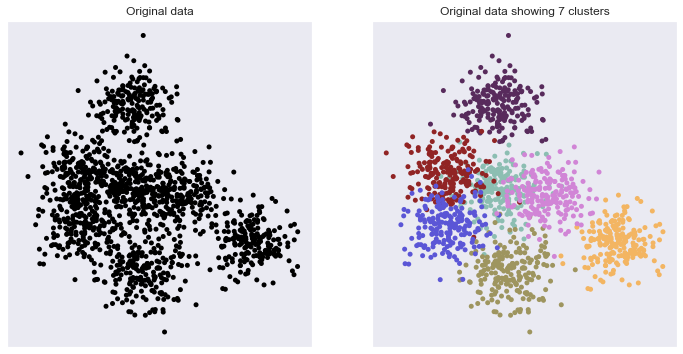

In [17]:
# show starting data. Use hand-picked colorblind-friendly colors rather than the garish defaults.
colors = ( '#582B5C', '#8CBEB2', '#9E955F', '#F3B562', '#912424',
           '#5B56D6', '#D185D6', '#408C18', '#7D3C19', '#8096BF')
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
for i in range(len(XY)):
    plt.scatter(XY[i][:,0], XY[i][:,1], c='black', edgecolors='none', s=25)
plt.title('Original data')
plt.xticks([], [])
plt.yticks([], [])

plt.subplot(1,2,2)
for i in range(len(XY)):
    plt.scatter(XY[i][:,0], XY[i][:,1], c=colors[i%len(colors)], edgecolors='none', s=25)
plt.title('Original data showing '+str(len(XY))+' clusters')
plt.xticks([], [])
plt.yticks([], [])
# file_helper.save_figure('clustering-start')
plt.show()

In [18]:
# reshape input data for KMeans and scatter plots
XY_points = []
scatter_x = []
scatter_y = []
for x in XY:
    XY_points.extend(x)
    scatter_x.extend(x[:,0])
    scatter_y.extend(x[:,1])

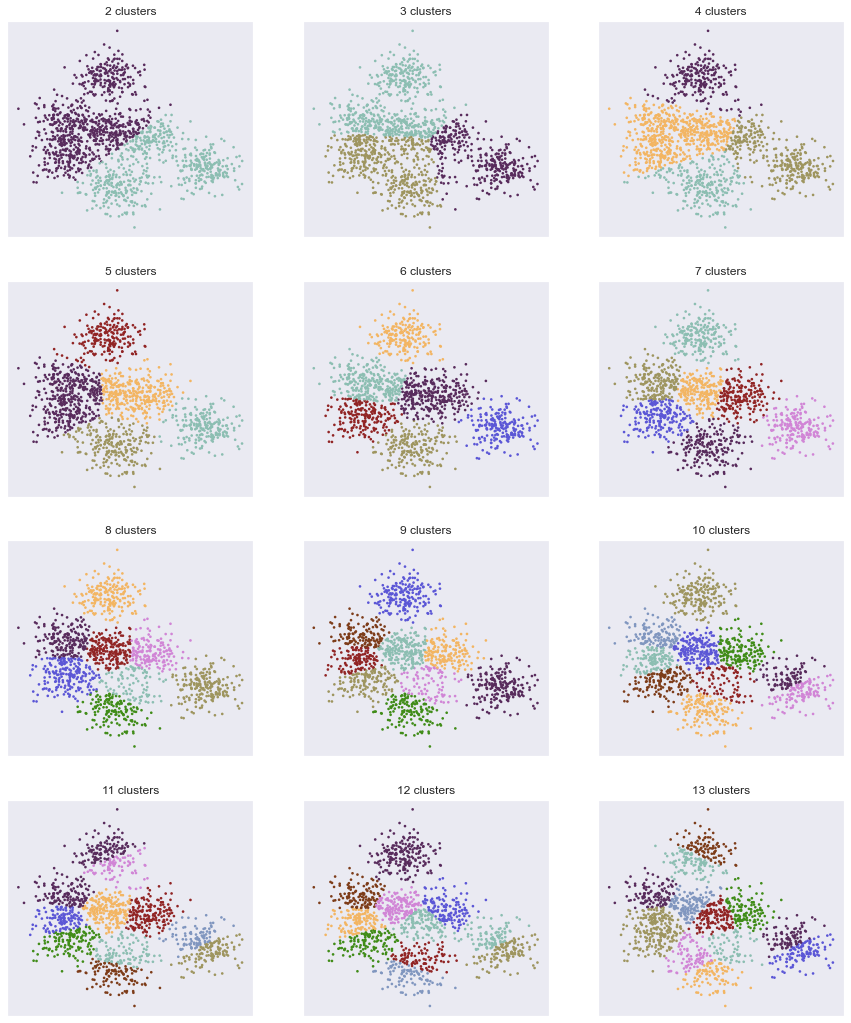

In [38]:
plt.figure(figsize=(10 + 5,10 + 5 + 3.3))
for num_clusters in range(2, 11 + 3):
    kMeans = KMeans(n_clusters=num_clusters)
    kMeans.fit(XY_points)
    predictions = kMeans.predict(XY_points)
    clrs = [colors[p%len(colors)] for p in predictions]
    plt.subplot(3 + 1, 3, num_clusters-1)
    plt.scatter(scatter_x, scatter_y, c=clrs, edgecolors='none', s=7)
    plt.xticks([], [])
    plt.yticks([], [])
    plt.title(str(num_clusters)+' clusters')
#file_helper.save_figure('clustering-fits')
plt.show()